In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Use with caution
if True:
    import warnings
    warnings.filterwarnings("ignore")

# Data loading and assembly

In [3]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0.0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0.0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0.0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0.0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1.0,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


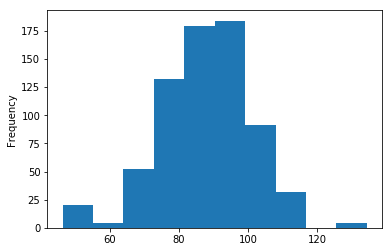

In [4]:
spectra['target'].plot.hist()
plt.savefig('Target histogram - no cleaning.png')
plt.show()

In [5]:
# dataset shape
spectra.shape

(698, 293)

In [6]:
spectra['target'].skew()


-0.3542939246986611

# Dataset clean ?

In [7]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [8]:
spectra.isnull().sum().sum()

0

In [9]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(293)
memory usage: 1.6 MB


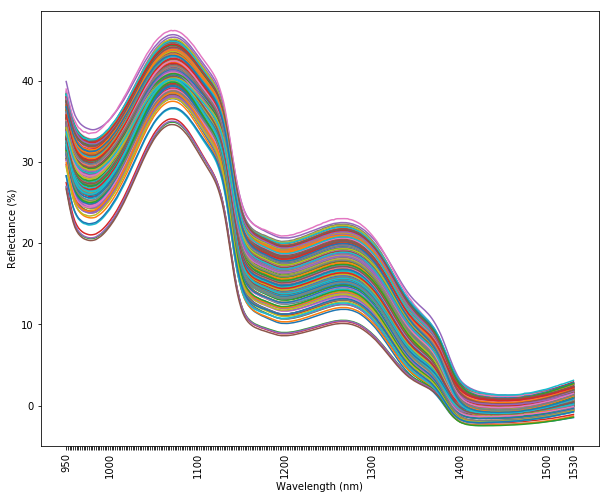

In [201]:
colnames = [str(x) for x in range(950, 1530+1,2)]
df = spectra[colnames].T
df.plot(legend=False, figsize=(10,8))
#plt.title('Spectras')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.savefig('General spectras.png')
plt.xticks(np.arange(len(colnames)), [v if (int(v) % 100 == 0) or k==0 or k==len(colnames)-1 else '' for (k,v) in enumerate(colnames)], rotation=90)
plt.show()

# Target description

In [11]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

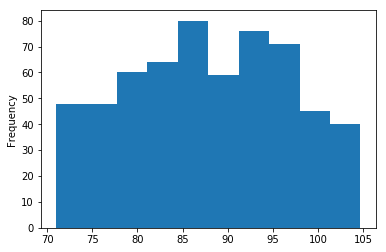

In [12]:
spectra['target'].plot.hist()
plt.savefig('Target histogram - with cleaning.png')
plt.show()

In [13]:
# The closer to 0, the better
spectra['target'].skew()


-0.031504138888319426

In [14]:
spectra[['target']].describe()

,target
count,591.000000
mean,87.928652
std,8.783686
min,71.000000
25%,81.000000
50%,87.333333
75%,94.666667
max,104.666667


# Regression

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False, random_state=47)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [17]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, window_length=5, polyorder=2, deriv=0, wavemin=950, wavemax=1530):# 
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv
        self.wavemin = wavemin
        self.wavemax = wavemax
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        colnames = [str(x) for x in range(self.wavemin, self.wavemax+1,2)]
        df = X[colnames].copy(deep=True)
        toreturn = df.apply(savgol_filter, args=(self.window_length, self.polyorder, self.deriv), axis=1, raw=True, result_type='broadcast')
        return toreturn

params={'window_length':5, 'polyorder':2, 'deriv':0}
savgol = Savgol(**params)
savgol.fit_transform(spectra).shape

(591, 291)

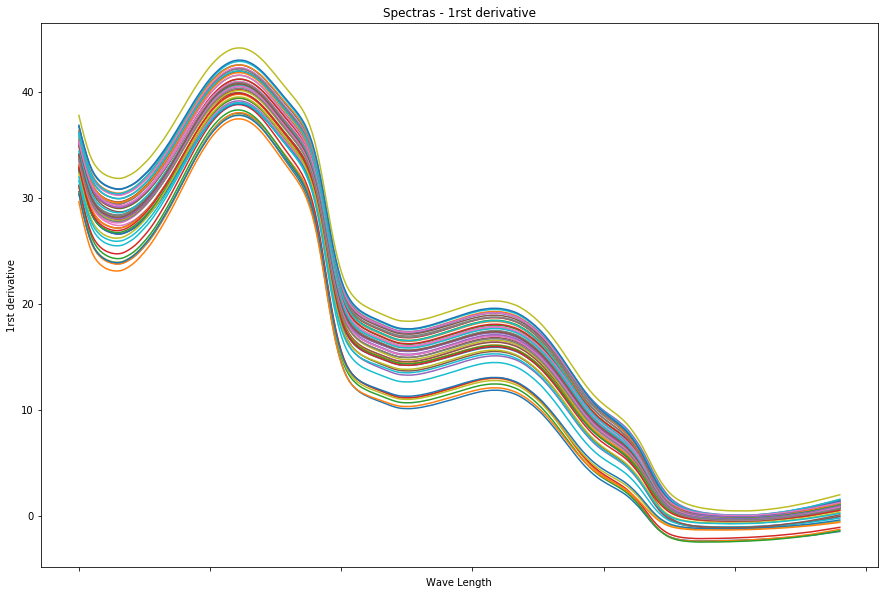

In [19]:
df = savgol.transform(spectra)
df.head(50).T.plot(legend=None, figsize=(15,10))
plt.title('Spectras - 1rst derivative')
plt.xlabel('Wave Length')
plt.ylabel('1rst derivative')
plt.show()

## Blocs creation

In [20]:
params={'window_length':5, 'polyorder':2, 'deriv':1}
savgol = Savgol(**params)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
from sklearn.decomposition import PCA
pca = PCA()

# Tree construction

In [23]:
lrpipelist1 = [('savgol', savgol), ('scaler', scaler), ('pca', pca)] #
pipe1 = Pipeline(lrpipelist1)
#Xtrans = pipe1.fit_transform(spectra)#.shape

In [24]:
pipe1.fit_transform(spectra).shape

(591, 291)

In [25]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

In [26]:
listpipereg = [('pipe1', pipe1), ('elnet', elnet)] #
pipereg = Pipeline(listpipereg)

In [27]:
pipereg.fit(spectra, spectra['target'])

Pipeline(memory=None,
     steps=[('pipe1', Pipeline(memory=None,
     steps=[('savgol', Savgol(deriv=1, polyorder=2, wavemax=1530, wavemin=950, window_length=5)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_sol...e=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))])

# PCA visualisation

In [28]:

Xtrans = pipe1.fit_transform(spectra)
Xtrans.shape

(591, 291)

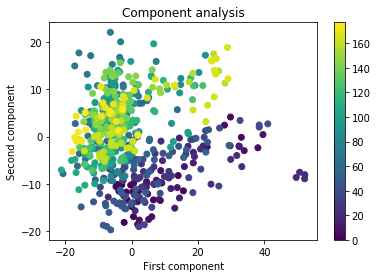

In [29]:
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=spectra['sampleID'])
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()

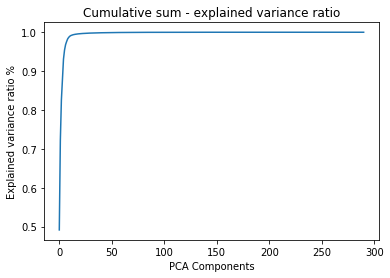

In [30]:
exp_variance_ratio_ = pipe1.named_steps['pca'].explained_variance_ratio_
cumsum=np.cumsum(exp_variance_ratio_)

plt.plot(range(cumsum.shape[0]), cumsum)
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Cumulative sum - explained variance ratio')
plt.xlabel('PCA Components')
plt.ylabel('Explained variance ratio %')
#plt.colorbar()
plt.show()

In [31]:
cumsum[:20]

array([0.49124441, 0.72152544, 0.82568602, 0.88017479, 0.93100178,
       0.95428137, 0.96815081, 0.97620263, 0.98303583, 0.98691969,
       0.98972409, 0.9914582 , 0.99255721, 0.99346592, 0.99412655,
       0.99463146, 0.99511788, 0.99548918, 0.99580453, 0.9960925 ])

### HyperOpt

In [32]:
pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'savgol', 'scaler', 'pca', 'savgol__deriv', 'savgol__polyorder', 'savgol__wavemax', 'savgol__wavemin', 'savgol__window_length', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten'])

In [33]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [187]:
counter = 0
bestscore = 1e20

#pipe1.set_params(savgol__window_length=9)
#Xtrans = pipe1.fit_transform(spectra)

def objective(params):
    #print(params)
    global counter
    global bestscore
    counter += 1
    
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        }
    
    pipe1.set_params(pca__n_components=int(params['pca__n_components']))
    pipe1.set_params(savgol__window_length=int(params['savgol__window_length'])+1)
    pipe1.set_params(savgol__deriv=int(params['savgol__deriv']))
    pipe1.set_params(savgol__wavemin=int(params['savgol__wavemin']))
    pipe1.set_params(savgol__wavemax=int(params['savgol__wavemax']))
    pipe1.set_params(savgol__polyorder=int(params['savgol__polyorder']))
    
    Xtrans = pipe1.fit_transform(spectra)
    
    elnet = ElasticNet(**hyperparams)
    
    preds = cross_val_predict(elnet, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 25 == 0:
        print("{} - RMSECV {}".format(counter, score**.5))
        #print(params)
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, params))
    
    return score

space = {
    'alpha': hp.loguniform('alpha', -3, 0),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1),
    'pca__n_components': hp.quniform('pca__n_components',10, 50, 1),
    'savgol__window_length': hp.quniform('savgol__window_length', 3, 19, 2),
    'savgol__deriv':hp.quniform('savgol__deriv', 1, 2, 1),
    'savgol__wavemin': hp.quniform('savgol__wavemin', 950, 1100, 2),
    'savgol__wavemax': hp.quniform('savgol__wavemax', 1300, 1530, 2),
    'savgol__polyorder':hp.quniform('savgol__polyorder', 2, 3, 1)
    
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=600)

1 - RMSECV 5.662279334536254 - {'alpha': 0.7460823542887152, 'l1_ratio': 0.8727168464889434, 'pca__n_components': 29.0, 'savgol__deriv': 2.0, 'savgol__polyorder': 3.0, 'savgol__wavemax': 1498.0, 'savgol__wavemin': 1088.0, 'savgol__window_length': 10.0}
4 - RMSECV 5.51969308943551 - {'alpha': 0.3085237306067479, 'l1_ratio': 0.3434762311269156, 'pca__n_components': 48.0, 'savgol__deriv': 2.0, 'savgol__polyorder': 2.0, 'savgol__wavemax': 1330.0, 'savgol__wavemin': 1078.0, 'savgol__window_length': 16.0}
5 - RMSECV 5.464676842796989 - {'alpha': 0.31758614395409146, 'l1_ratio': 0.8060281777606212, 'pca__n_components': 13.0, 'savgol__deriv': 1.0, 'savgol__polyorder': 3.0, 'savgol__wavemax': 1342.0, 'savgol__wavemin': 1070.0, 'savgol__window_length': 10.0}
7 - RMSECV 5.316145800188932 - {'alpha': 0.09257002869334435, 'l1_ratio': 0.8021798165047392, 'pca__n_components': 47.0, 'savgol__deriv': 2.0, 'savgol__polyorder': 2.0, 'savgol__wavemax': 1362.0, 'savgol__wavemin': 1090.0, 'savgol__window_le

In [188]:
best

{'alpha': 0.08935133753155289,
 'l1_ratio': 0.44338063592995686,
 'pca__n_components': 39.0,
 'savgol__deriv': 2.0,
 'savgol__polyorder': 2.0,
 'savgol__wavemax': 1440.0,
 'savgol__wavemin': 1020.0,
 'savgol__window_length': 12.0}

In [189]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        }

elnet = ElasticNet(**params)

params

{'alpha': 0.08935133753155289,
 'l1_ratio': 0.44338063592995686,
 'random_state': 0}

In [190]:
pipe1.set_params(pca__n_components=int(best['pca__n_components']))
pipe1.set_params(savgol__window_length=int(best['savgol__window_length'])+1)
pipe1.set_params(savgol__deriv=int(best['savgol__deriv']))
pipe1.set_params(savgol__wavemin=int(best['savgol__wavemin']))
pipe1.set_params(savgol__wavemax=int(best['savgol__wavemax']))
pipe1.set_params(savgol__polyorder=int(best['savgol__polyorder']))
pipe1.fit(spectra)
Xtrans = pipe1.transform(spectra)

In [191]:

preds = cross_val_predict(elnet, Xtrans, spectra['target'], cv=kf)
mean_squared_error(preds, spectra['target'])

24.518113823773156

In [192]:
mean_squared_error(preds, spectra['target'])**.5

4.951576902742515

## Truncated spectras

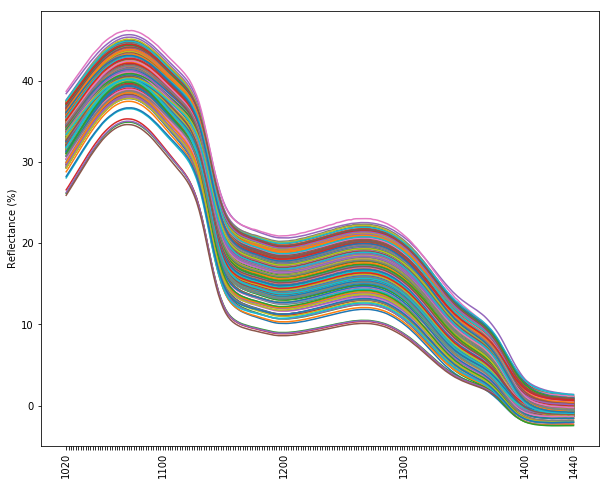

In [193]:
colnames = [str(x) for x in range(int(best['savgol__wavemin']), int(best['savgol__wavemax'])+1,2)]
df = spectra[colnames].T
df.plot(legend=False, figsize=(10,8))
#plt.title('Spectras')
#plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.savefig('Truncated spectras.png')
plt.xticks(np.arange(len(colnames)), [v if (int(v) % 100 == 0) or k==0 or k==len(colnames)-1 else '' for (k,v) in enumerate(colnames)], rotation=90)
plt.show()

# hyper parameters Sensitivity

In [194]:
alpha_range = np.logspace(-3, 0, 21)
l1_ratio_range = np.linspace(0.0001, 1, 21)
param_grid = dict(alpha=alpha_range, l1_ratio=l1_ratio_range)

elnet = ElasticNet(random_state=0, max_iter=10000)

grid = GridSearchCV(elnet, param_grid=param_grid, cv=kf, n_jobs=-2, scoring='neg_mean_squared_error')
grid.fit(Xtrans, spectra['target'])


GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=False),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'alpha': array([0.001  , 0.00141, 0.002  , 0.00282, 0.00398, 0.00562, 0.00794,
       0.01122, 0.01585, 0.02239, 0.03162, 0.04467, 0.0631 , 0.08913,
       0.12589, 0.17783, 0.25119, 0.35481, 0.50119, 0.70795, 1.     ]), 'l1_ratio': array([1.00000e-04, 5.00950e-02, 1.00090e-01, 1.50085e-...0e-01,
       7.50025e-01, 8.00020e-01, 8.50015e-01, 9.00010e-01, 9.50005e-01,
       1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [195]:
grid.best_params_

{'alpha': 0.08912509381337455, 'l1_ratio': 1.0}

In [196]:
(-grid.best_score_)**.5

4.87112444547008

In [197]:
scores = grid.cv_results_['mean_test_score'].reshape(len(l1_ratio_range),len(alpha_range))

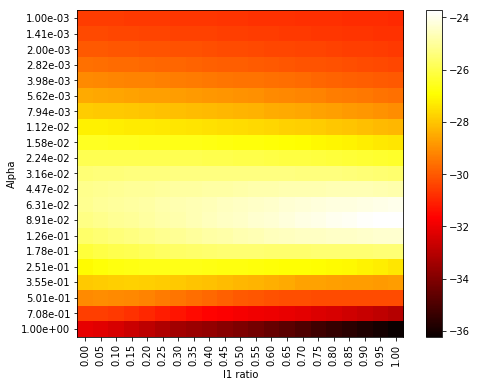

In [198]:
# heat map
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,)
plt.ylabel('Alpha')
plt.xlabel('l1 ratio')
plt.colorbar()
plt.yticks(np.arange(len(alpha_range)), ['{:.2e}'.format(x) for x in alpha_range])
plt.xticks(np.arange(len(l1_ratio_range)), ['{:.2f}'.format(x) for x in l1_ratio_range], rotation=90)
#plt.title('Negative MSE score')
plt.savefig('elasticnet sensitivity.png')
plt.show()

## Component Selection - Linear regression - No regularization

In [199]:
rmsecv = []
components = np.arange(2,75,2)

from sklearn.linear_model import LinearRegression

for component in components:
    pipe1.set_params(pca__n_components=component)
    Xtrans = pipe1.fit_transform(spectra)
    
    lr = LinearRegression()
    
    preds = cross_val_predict(lr, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    rmsecv.append(score)
    


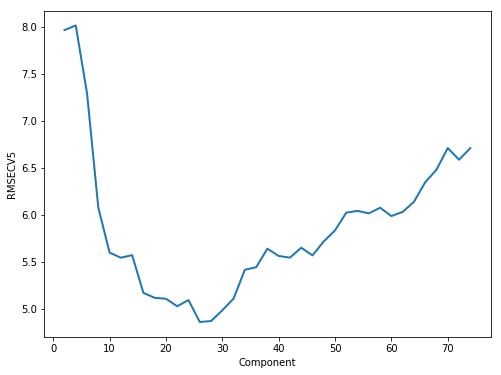

In [200]:
plt.figure(figsize=(8, 6))
plt.plot(components, np.array(rmsecv)**.5, '-', linewidth=2)
plt.ylabel('RMSECV5')
plt.xlabel('Component')
plt.savefig('components - RMSECV.png')
plt.show()


## Score accuracy - Elastic Net

In [72]:
df = pd.DataFrame({'target':spectra['target'], 'pred':preds, 'sampleID':spectra['sampleID'],}) #
df.head()

,target,pred,sampleID
0,94.333333,98.387492,0.0
1,94.333333,100.855096,0.0
2,94.333333,99.204461,0.0
3,94.333333,98.781821,0.0
4,76.333333,81.021915,1.0


In [73]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,target,pred,sampleID,delta,deltaabs
0,94.333333,98.387492,0.0,-4.054159,4.054159
1,94.333333,100.855096,0.0,-6.521762,6.521762
2,94.333333,99.204461,0.0,-4.871128,4.871128
3,94.333333,98.781821,0.0,-4.448487,4.448487
4,76.333333,81.021915,1.0,-4.688581,4.688581


In [74]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 1.0 : percent 15.23 %
prediction +/- 2.0 : percent 31.64 %
prediction +/- 3.0 : percent 43.49 %
prediction +/- 4.0 : percent 56.51 %
prediction +/- 6.0 : percent 74.11 %
prediction +/- 8.0 : percent 89.85 %
prediction +/- 10.0 : percent 95.60 %


In [75]:
df[['delta']].describe()

,delta
count,591.000000
mean,0.091265
std,4.998187
min,-13.010660
25%,-3.355936
50%,-0.415641
75%,3.550627
max,15.911736


In [76]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


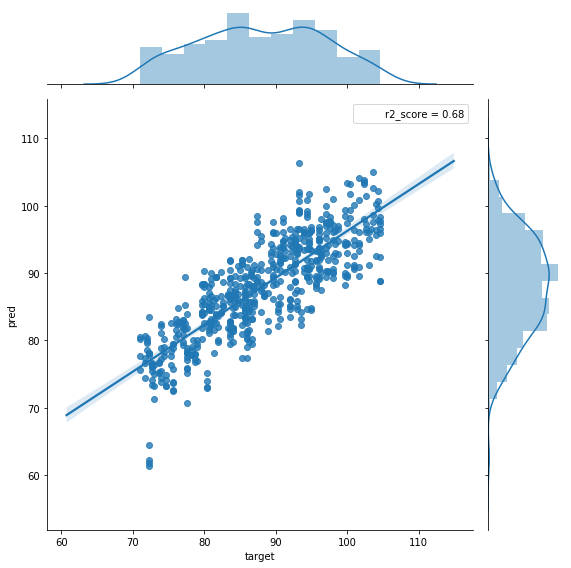

In [77]:
from scipy import stats
from sklearn.metrics import r2_score

sns.jointplot(x='target', y='pred', data=df,  height=8, stat_func=r2_score, kind='reg',)
plt.xlabel('Actual tenderometer reading')
plt.ylabel('Predicted tenderometer reading')
plt.savefig('result regression enet.png')
plt.show()

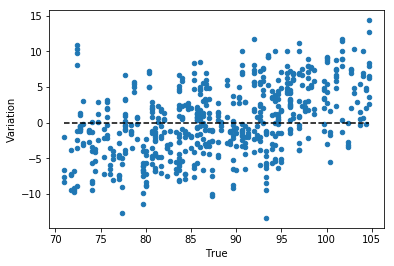

,delta
count,591.000000
mean,0.166784
std,4.959102
min,-13.359373
25%,-3.323453
50%,-0.121469
75%,3.609777
max,14.333791


In [140]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
#plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.savefig('residual enet.png')
plt.show()
df[['delta']].describe()

# SVR

In [54]:
from sklearn.svm import SVR
svr = SVR()

In [123]:
counter = 0
bestscore = 1e20


def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'kernel': params['kernel'],
        #'degree': params['degree'],
        'C':params['C'],
        'epsilon':params['epsilon'],
        }
    
    pipe1.set_params(pca__n_components=int(params['pca__n_components']))
    pipe1.set_params(savgol__window_length=int(params['savgol__window_length'])+1)
    pipe1.set_params(savgol__deriv=int(params['savgol__deriv']))
    pipe1.set_params(savgol__wavemin=int(params['savgol__wavemin']))
    pipe1.set_params(savgol__wavemax=int(params['savgol__wavemax']))
    pipe1.set_params(savgol__polyorder=int(params['savgol__polyorder']))
    
    Xtrans = pipe1.fit_transform(spectra)
    
    svr = SVR(**hyperparams)
    
    preds = cross_val_predict(svr, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    if counter % 25 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, params))
    return score

space = {
    'kernel':hp.choice('kernel', ['linear', 'poly', 'rbf']), #'linear', 'poly', 'rbf'
    #'degree':hp.quniform('degree', 2, 3, 1),
    'C': hp.loguniform('C', -2, 1),
    'epsilon': hp.loguniform('epsilon', -2, 1),
    'pca__n_components': hp.quniform('pca__n_components',10, 50, 1),
    'savgol__window_length': hp.quniform('savgol__window_length', 3, 19, 2),
    'savgol__deriv':hp.quniform('savgol__deriv', 1, 2, 1),
    'savgol__wavemin': hp.quniform('savgol__wavemin', 950, 1100, 2),
    'savgol__wavemax': hp.quniform('savgol__wavemax', 1300, 1530, 2),
    'savgol__polyorder':hp.quniform('savgol__polyorder', 2, 3, 1)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=600)

1 - RMSECV 5.280672782424439 - {'C': 1.0439427041494784, 'epsilon': 2.360662036548658, 'kernel': 'linear', 'pca__n_components': 46.0, 'savgol__deriv': 2.0, 'savgol__polyorder': 3.0, 'savgol__wavemax': 1416.0, 'savgol__wavemin': 1088.0, 'savgol__window_length': 14.0}
14 - RMSECV 5.2183736258438165 - {'C': 1.4669474069485144, 'epsilon': 0.7574653165043223, 'kernel': 'linear', 'pca__n_components': 37.0, 'savgol__deriv': 1.0, 'savgol__polyorder': 3.0, 'savgol__wavemax': 1334.0, 'savgol__wavemin': 978.0, 'savgol__window_length': 16.0}
21 - RMSECV 5.152881583533077 - {'C': 0.8189995784120517, 'epsilon': 2.6031320819744765, 'kernel': 'linear', 'pca__n_components': 39.0, 'savgol__deriv': 2.0, 'savgol__polyorder': 3.0, 'savgol__wavemax': 1524.0, 'savgol__wavemin': 954.0, 'savgol__window_length': 14.0}
23 - RMSECV 5.054199623213423 - {'C': 0.7443024886069225, 'epsilon': 2.4149021581115275, 'kernel': 'linear', 'pca__n_components': 36.0, 'savgol__deriv': 2.0, 'savgol__polyorder': 3.0, 'savgol__wav

In [124]:
best

{'C': 0.7863003012583292,
 'epsilon': 2.6235098271520054,
 'kernel': 0,
 'pca__n_components': 34.0,
 'savgol__deriv': 2.0,
 'savgol__polyorder': 3.0,
 'savgol__wavemax': 1528.0,
 'savgol__wavemin': 952.0,
 'savgol__window_length': 12.0}

In [125]:
pipe1.set_params(pca__n_components=int(best['pca__n_components']))
pipe1.set_params(savgol__window_length=int(best['savgol__window_length'])+1)
pipe1.set_params(savgol__deriv=int(best['savgol__deriv']))
pipe1.set_params(savgol__wavemin=int(best['savgol__wavemin']))
pipe1.set_params(savgol__wavemax=int(best['savgol__wavemax']))
pipe1.set_params(savgol__polyorder=int(best['savgol__polyorder']))
pipe1.fit(spectra)
Xtrans = pipe1.transform(spectra)

In [110]:
C_range = np.logspace(-2, 1, 21)
epsilon_range = np.logspace(-1, 1, 21)
param_grid = dict(C=C_range, epsilon=epsilon_range)

svr = SVR(kernel='linear')

grid = GridSearchCV(svr, param_grid=param_grid, cv=kf, n_jobs=-2, scoring='neg_mean_squared_error')
grid.fit(Xtrans, spectra['target'])

GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=False),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'C': array([ 0.01   ,  0.01413,  0.01995,  0.02818,  0.03981,  0.05623,
        0.07943,  0.1122 ,  0.15849,  0.22387,  0.31623,  0.44668,
        0.63096,  0.89125,  1.25893,  1.77828,  2.51189,  3.54813,
        5.01187,  7.07946, 10.     ]), 'epsilon': array([ 0.1    ,  0.12589,  0.15...   1.58489,  1.99526,  2.51189,  3.16228,  3.98107,  5.01187,
        6.30957,  7.94328, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [111]:
grid.best_params_

{'C': 1.7782794100389228, 'epsilon': 6.309573444801933}

In [112]:
(-grid.best_score_)**.5

4.943649598565751

In [113]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(epsilon_range))

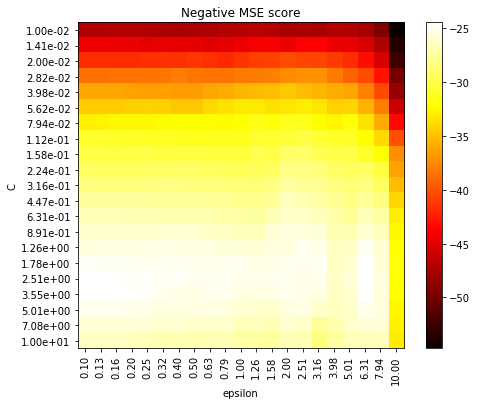

In [114]:
# heat map
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,)
plt.ylabel('C')
plt.xlabel('epsilon')
plt.colorbar()
plt.yticks(np.arange(len(C_range)), ['{:.2e}'.format(x) for x in C_range])
plt.xticks(np.arange(len(epsilon_range)), ['{:.2f}'.format(x) for x in epsilon_range], rotation=90)
#plt.title('Negative MSE score')
plt.savefig('SVR sensitivity.png')
plt.show()

## Score accuracy - SVR

In [126]:
params = {'kernel':'linear',
          'C':best['C'],
          'epsilon':best['epsilon'],
    
}
svr = SVR(**params)
preds = cross_val_predict(svr, Xtrans, spectra['target'], cv=kf)
mean_squared_error(preds, spectra['target'])**.5

4.95771123496486

In [127]:
df = pd.DataFrame({'target':spectra['target'], 'pred':preds, 'sampleID':spectra['sampleID'],}) #
df.head()

,target,pred,sampleID
0,94.333333,97.540939,0.0
1,94.333333,99.663296,0.0
2,94.333333,99.753794,0.0
3,94.333333,99.502247,0.0
4,76.333333,80.335451,1.0


In [128]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,target,pred,sampleID,delta,deltaabs
0,94.333333,97.540939,0.0,-3.207606,3.207606
1,94.333333,99.663296,0.0,-5.329962,5.329962
2,94.333333,99.753794,0.0,-5.420461,5.420461
3,94.333333,99.502247,0.0,-5.168913,5.168913
4,76.333333,80.335451,1.0,-4.002118,4.002118


In [129]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 1.0 : percent 13.87 %
prediction +/- 2.0 : percent 31.13 %
prediction +/- 3.0 : percent 44.67 %
prediction +/- 4.0 : percent 54.48 %
prediction +/- 6.0 : percent 74.45 %
prediction +/- 8.0 : percent 90.19 %
prediction +/- 10.0 : percent 97.12 %


/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


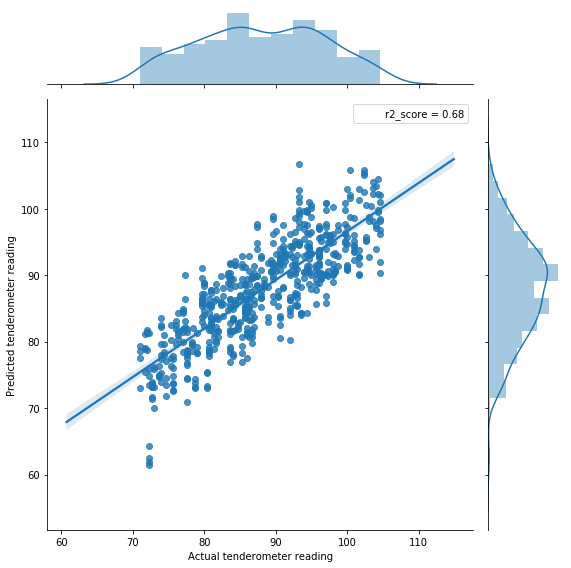

In [139]:
from scipy import stats
from sklearn.metrics import r2_score

sns.jointplot(x='target', y='pred', data=df,  height=8, stat_func=r2_score, kind='reg',)
plt.xlabel('Actual tenderometer reading')
plt.ylabel('Predicted tenderometer reading')
plt.savefig('result regression SVR.png')
plt.show()




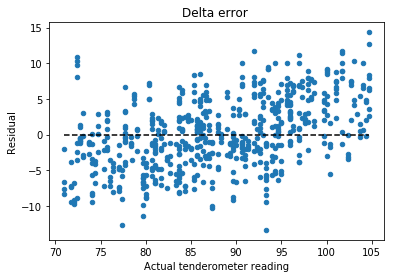

,delta
count,591.000000
mean,0.166784
std,4.959102
min,-13.359373
25%,-3.323453
50%,-0.121469
75%,3.609777
max,14.333791


In [141]:
df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('Actual tenderometer reading')
plt.ylabel('Residual')
plt.show()
plt.savefig('residual SVR.png')
df[['delta']].describe()

